In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Petrol prices in India

### Dataset contents

In this case we're importing information on:

*   **city** - where the corresponding price was recorded,
*   **date** - when the price was recorded,
*   **rate** - the price of petrol,
*   **district** - the part of India where the city is.



In [4]:
petrol_prices = pd.read_csv('./Preparation of the dataset/Petrol Prices/petrol_prices.csv')
petrol_prices

,city,date,rate,district
0,Chittoor,2016-07-01,70.75,Andhra Pradesh
1,Chittoor,2016-07-15,68.43,Andhra Pradesh
2,Chittoor,2016-08-01,67.06,Andhra Pradesh
3,Chittoor,2016-08-15,66.08,Andhra Pradesh
4,Chittoor,2016-09-01,69.56,Andhra Pradesh
...,...,...,...,...
21679,Kadapa,2021-02-25,96.12,Andhra Pradesh
21680,Kadapa,2021-02-26,96.12,Andhra Pradesh
21681,Kadapa,2021-02-27,96.36,Andhra Pradesh
21682,Kadapa,2021-02-28,96.36,Andhra Pradesh


## Notebook preparation

### Checking data types

In [5]:
petrol_prices.dtypes

city         object
date         object
rate        float64
district     object
dtype: object

In [6]:
"complete records: " + str(len(petrol_prices.dropna(how="any"))) + "; total records: " + str(len(petrol_prices))

'complete records: 21684; total records: 21684'

### Date conversion

In [7]:
petrol_prices["date"] = pd.to_datetime(petrol_prices["date"])

In [8]:
petrol_prices["date"].value_counts()

date
2019-08-27    25
2016-11-06    25
2016-11-16    25
2017-10-04    25
2020-02-27    24
              ..
2019-08-12     1
2019-07-12     1
2019-07-11     1
2019-03-29     1
2019-12-28     1
Name: count, Length: 1073, dtype: int64

### Identifying city names in the set

In [9]:
petrol_prices["city"].value_counts()

city
Chandigarh         1044
Hyderabad          1036
Silvassa            964
Daman               964
Itanagar            920
Port Blair          916
Vizag               880
Guntur              880
Golaghat            880
Ambikapur           880
Araria              880
Vizianagaram        876
Kakinada            876
Barpeta             876
Srikakulam          876
Anantapur           876
Kadapa              876
Machilipatnam       876
Kurnool             876
Nellore             876
Ongole              876
Dibrugarh           876
Eluru               876
Chittoor            872
Connaught Place      56
Name: count, dtype: int64

### Identifying district names in the set

In [10]:
petrol_prices["district"].value_counts()

district
Andhra Pradesh                 12428
Assam                           2632
Chandigarh                      1044
Dadra and Nagar Haveli           964
Daman and Diu                    964
Arunachal Pradesh                920
Andaman and Nicobar Islands      916
Chhattisgarh                     880
Bihar                            880
Delhi                             56
Name: count, dtype: int64

In [11]:
petrol_prices["district"] = petrol_prices["district"].astype("category")

### Price statistics

In [12]:
petrol_prices.describe()

,date,rate
count,21684,21684.000000
mean,2019-07-19 17:19:25.467625984,77.714397
min,2011-11-16 00:00:00,48.600000
25%,2018-09-17 00:00:00,73.650000
50%,2019-11-05 00:00:00,77.150000
75%,2020-07-19 00:00:00,83.620000
max,2021-03-01 00:00:00,97.850000
std,NaN,7.312926


## Exercises

**Exercise 1**

In [15]:
sns.set_theme(
    style="darkgrid",
    context="notebook",
    palette="tab10"
    )

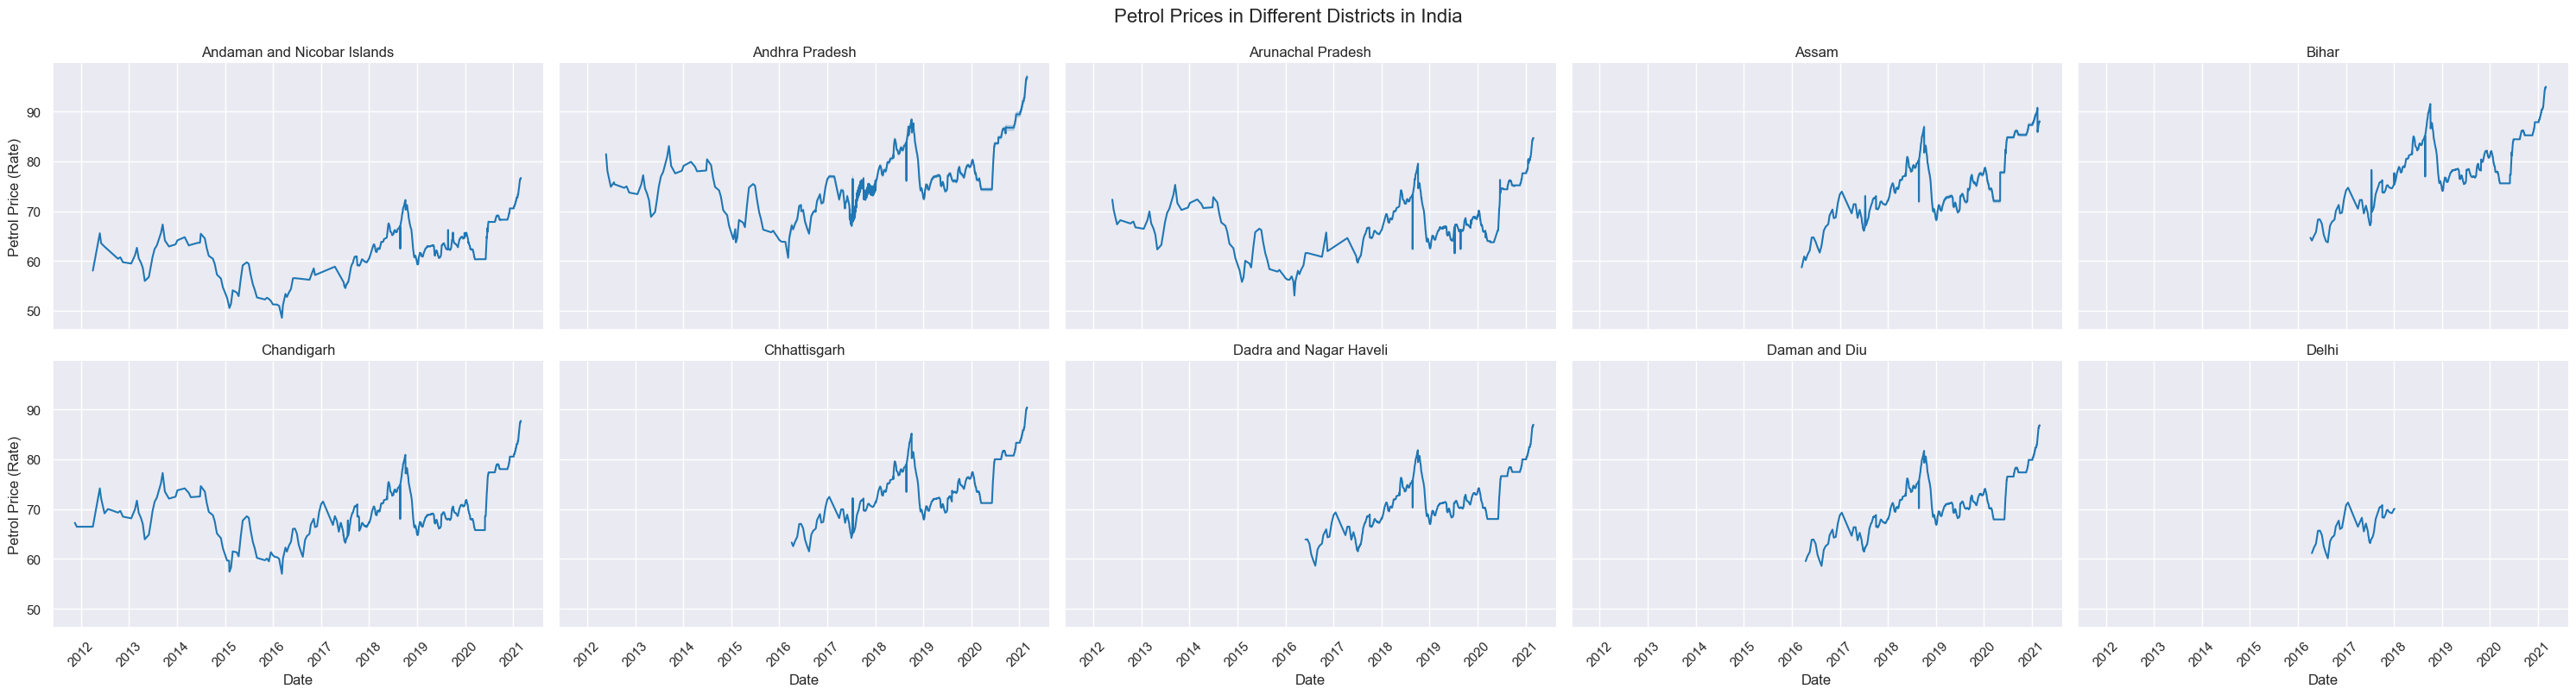

In [19]:
g = sns.relplot(
    data=petrol_prices,
    x="date",
    y="rate",
    col="district",
    col_wrap=5,
    kind="line",
    height=4,
    aspect=1.5,
    facet_kws={'sharey': True, 'sharex': True}
)

g.set_titles("{col_name}")
g.set_axis_labels("Date", "Petrol Price (Rate)")
g.tight_layout()

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Petrol Prices in Different Districts in India", fontsize=16)

plt.show()

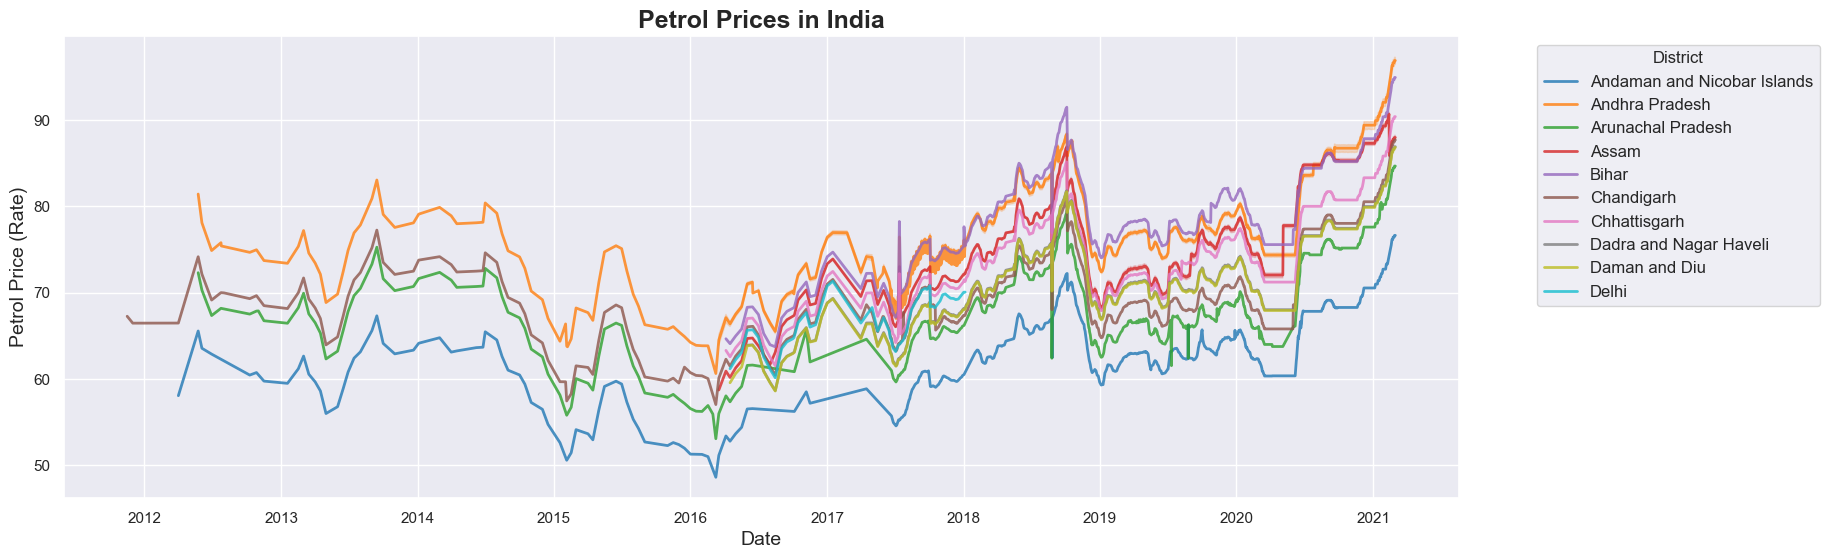

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(
    data=petrol_prices,
    x="date",
    y="rate",
    hue="district",
    linewidth=2,
    alpha=0.8
)

plt.title("Petrol Prices in India", fontsize=18, weight="bold")
plt.xlabel("Date", fontsize=14)
plt.ylabel("Petrol Price (Rate)", fontsize=14)

plt.legend(title="District", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.show()

**Exercise 2**

In [30]:
sns.set_theme(
    style="whitegrid",
    context="notebook",
    palette="tab10"
    )

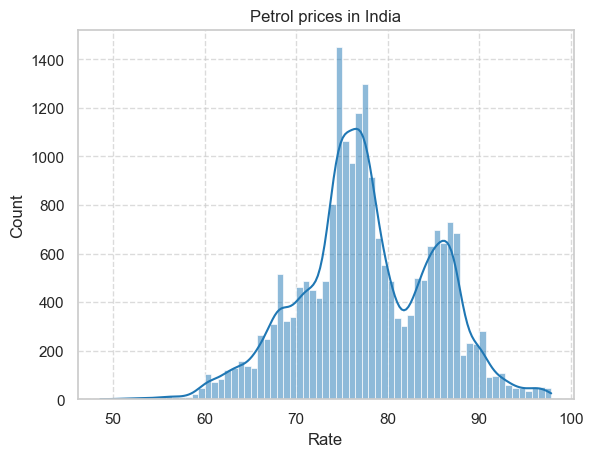

In [38]:
sns.histplot(data=petrol_prices, x="rate", kde=True)
plt.title("Petrol prices in India")
plt.xlabel("Rate")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

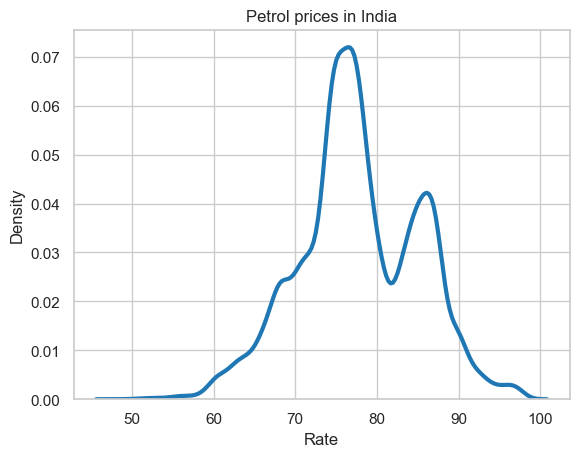

In [35]:
sns.kdeplot(data=petrol_prices, x="rate", linewidth=3)
plt.title("Petrol prices in India")
plt.xlabel("Rate")
plt.show()